In [1]:
import cv2
import numpy as np
import os
import sys
import random
import matplotlib.pyplot as plt
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

In [ ]:
def convert_images():
    l = ['0', '1', '2', '3', '4']
    print("Başladı")
    count = 0
    for m, _, f in os.walk("./new/"):
        if len(f) > 1:
            for file in f:
                if count % 1000 == 0:
                    print(count)
                #print(m + "/" + file + "    DONE")
                Example_Image = cv2.imread(m + "/" + file)
                Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)
                Hessian_Mat = hessian_matrix(Example_Image,sigma=3,order="rc")
                max_S,__ = hessian_matrix_eigvals(Hessian_Mat)
                plt.imsave("./new_converted_imgs/" + l[int(m[-1])] + "/" + file, max_S)
                count+=1
            print(m + "    DONE")
convert_images()

Başladı
0
./new/0    DONE
1000
./new/1    DONE
2000
./new/2    DONE
./new/3    DONE
3000


ValueError: too many values to unpack (expected 2)

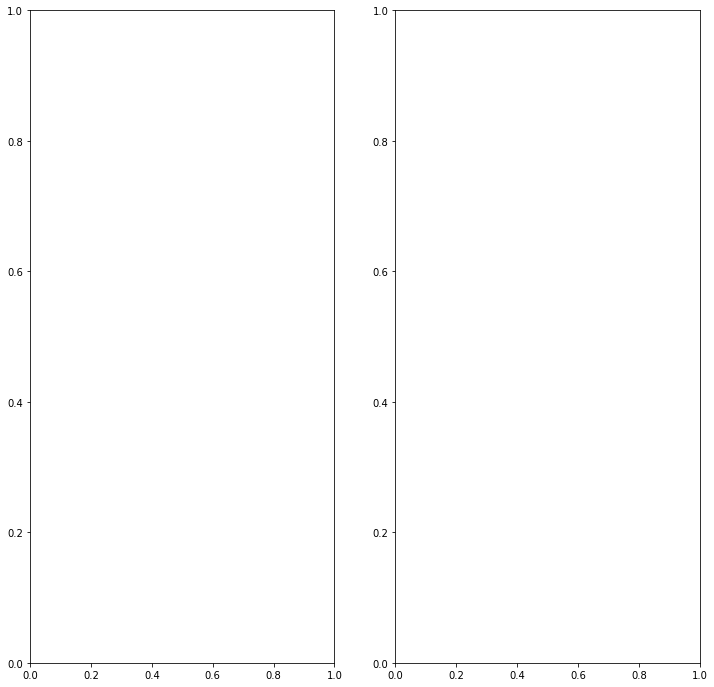

In [5]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

Example_Image = cv2.imread("./images/3/34445_right.jpeg")
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=2,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)
plt.imsave("new_image.jpeg", max_S)
axis[0].imshow(min_S)
axis[1].imshow(max_S)

In [11]:
def get_random_image():
    path = "./images/"
    folder = random.randint(0,4)
    img = random.choice(os.listdir(path + str(folder)))
    return path + str(folder) + "/" + img
    

In [12]:
get_random_image()

'./images/2/24524_left.jpeg'

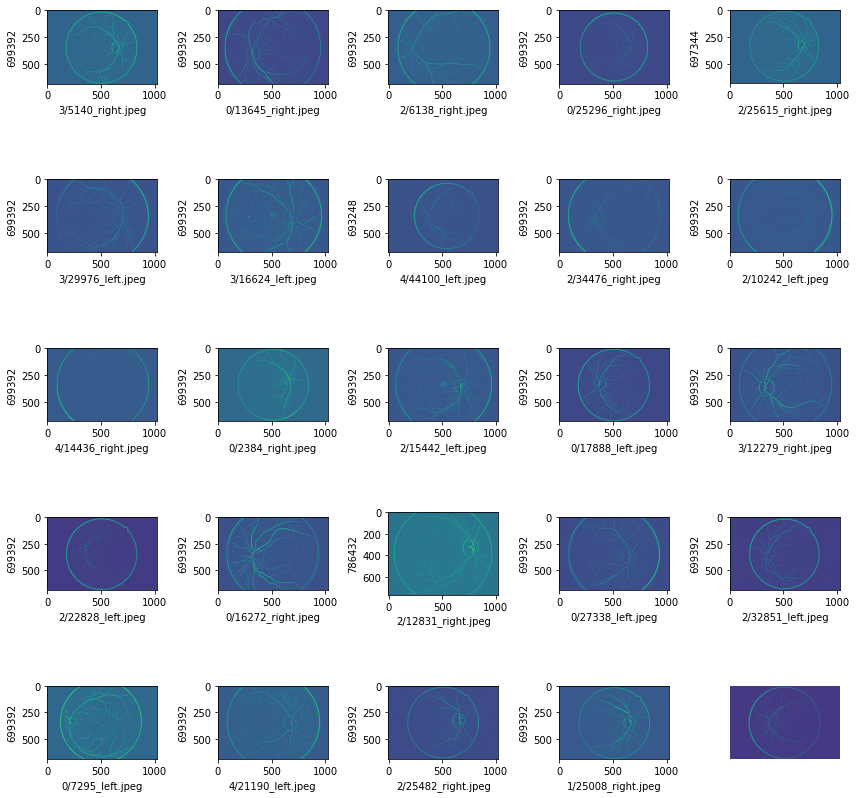

In [15]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(12,12))
for i,ax in enumerate(axis.flat):
    img = get_random_image()
    Example_Image = cv2.imread(img)
    Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)

    Hessian_Mat = hessian_matrix(Example_Image,sigma=3,order="rc")
    max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)
    ax.set_xlabel("/".join(img.split("/")[2:]))
    ax.set_ylabel(max_S.size)
    ax.imshow(max_S)
plt.tight_layout()
plt.axis("off")
plt.show()